In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df.tail()        # 데이터프레임의 "마지막 5행"을 보여준다.
                 # → 뒤쪽에 이상한 값이 섞여 있는지, 정렬 상태가 어떤지 확인할 때 사용.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [19]:
df.shape         # 데이터의 구조(행 수, 열 수)를 튜플 형태로 반환한다.
                 # → 전체 데이터 크기를 파악하고, 결측치 제거 후 변화도 확인할 때 유용함.

(5110, 12)

In [20]:
df.dtypes        # 각 컬럼의 데이터 타입(int, float, object 등)을 보여준다.
                 # → EDA에서 수치형/범주형 변수 분리하는 기준이 됨.
                 # → 잘못된 타입(예: 숫자인데 object로 되어 있는 경우)을 탐지할 수 있음.

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
df.columns       # 전체 컬럼 이름을 리스트 형태로 보여준다.
                 # → 어떤 변수들이 있는지 빠르게 구조 파악할 때 사용.
                 # → 오타, 공백 포함 여부, 컬럼명 정제 필요성도 여기서 확인.

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# 결측치
df.isna().sum().to_frame("n_missing")

,n_missing
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [5]:
# 기초 통계량
df.describe(include="all")  # 숫자형 + 범주형 요약

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


나이/혈당/BMI 범위 이상한 값 있는지
평균, 중앙값, 사분위 보고 대충 분포가 어떤지 이야기

In [7]:
# 타겟 분포
outcome_counts = (
    df["stroke"]
      .value_counts()
      .to_frame("count")
)

outcome_counts["ratio"] = (
    outcome_counts["count"] / len(df)
).round(3)

outcome_counts


,count,ratio
stroke,,
0,4861,0.951
1,249,0.049


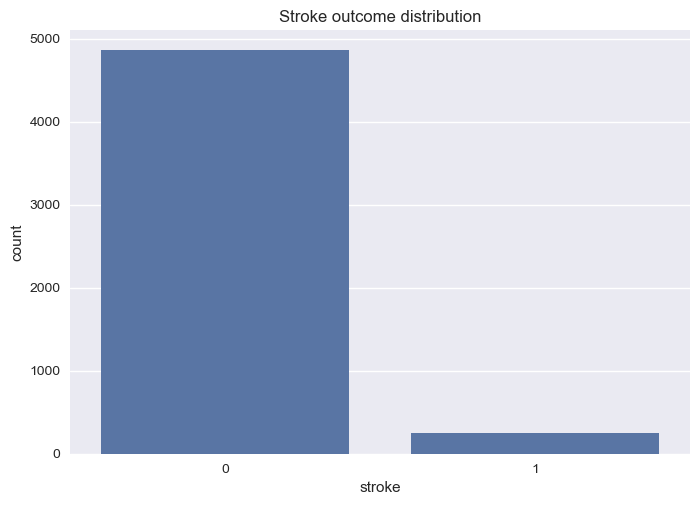

In [8]:
sns.countplot(data=df, x="stroke")
plt.title("Stroke outcome distribution")
plt.show()


“stroke=1 비율이 어느 정도예요?”

“이 정도면 나중에 모델링할 때 클래스 불균형 고려(예: class weight, resampling)가 필요하겠죠?”

→ 여기까지만 해도 팀이 데이터 불균형 문제를 인지하게 돼.

In [22]:
# 수치형 변수 리스트 만들기
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("stroke")
cat_cols = df.select_dtypes(include=["object"]).columns

num_cols, cat_cols


(Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
        'bmi'],
       dtype='object'),
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

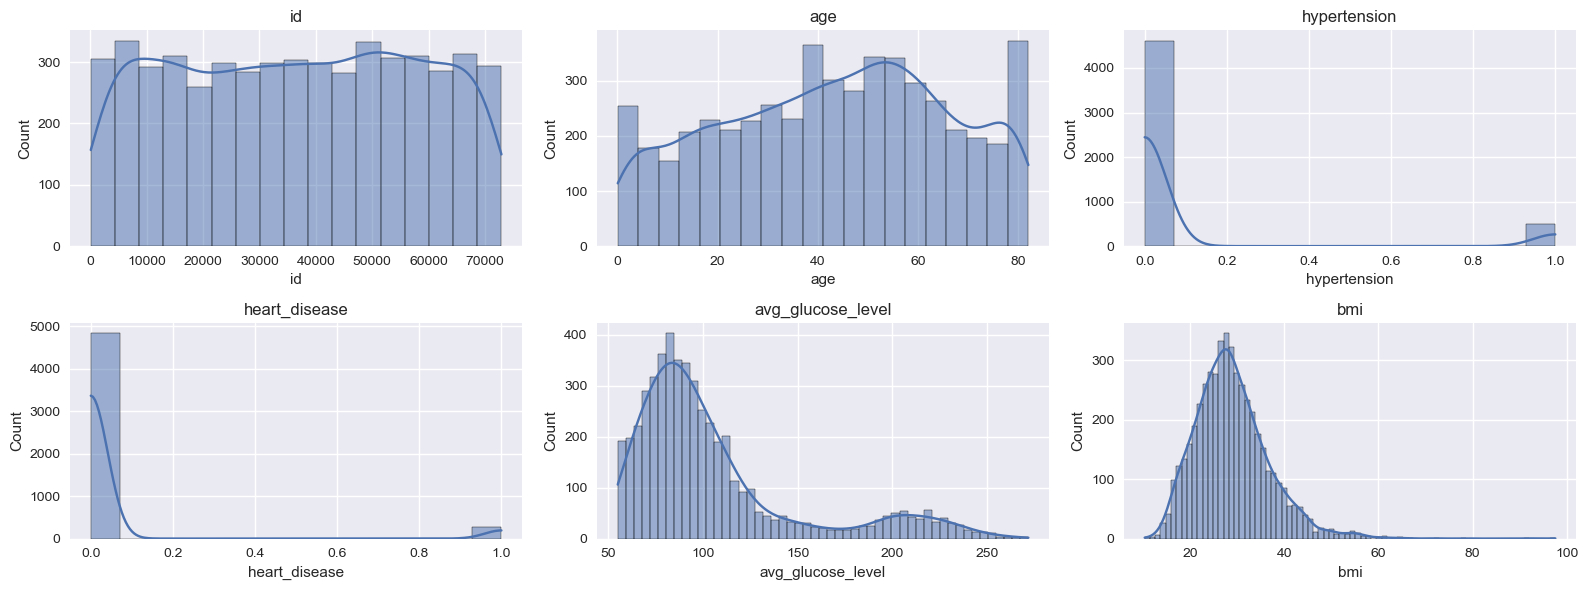

In [23]:
# 수치평 히스토그램 + KDE
fig, axes = plt.subplots(
    nrows=2,
    ncols=int(np.ceil(len(num_cols)/2)),
    figsize=(16, 6)
)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


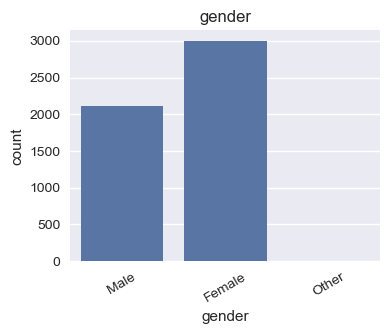

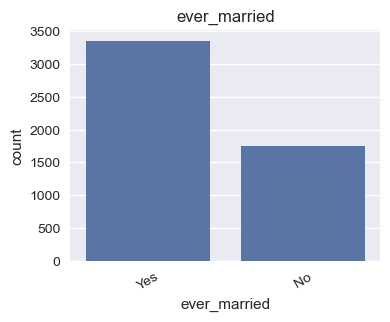

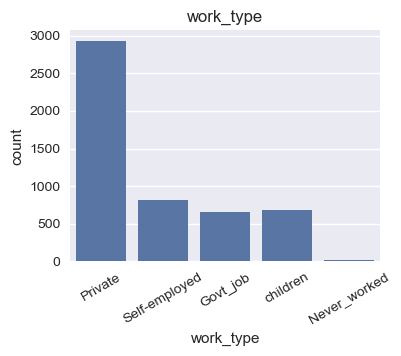

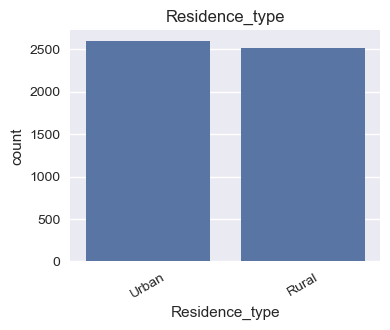

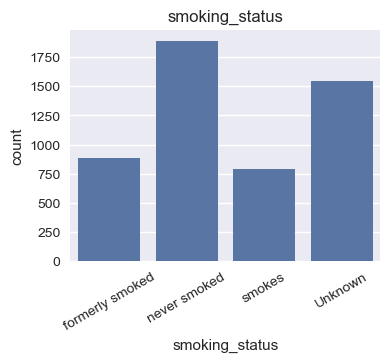

In [24]:
# 범주형 막대 그래프
for col in cat_cols:
    plt.figure(figsize=(4,3))
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=30)
    plt.show()


“카테고리가 너무 많은 컬럼은 없나?” (rare category 처리 필요성)

“특정 범주가 압도적으로 많은 변수가 있나?”

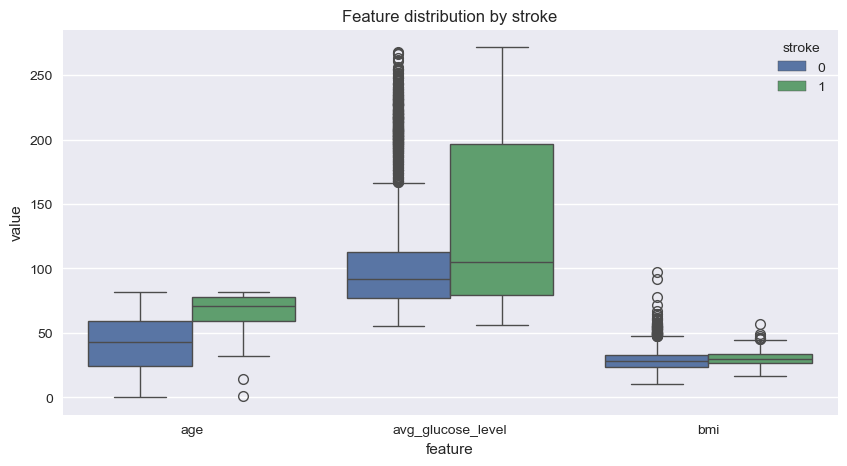

In [12]:
# 수치형 vs stroke
selected = ["age", "avg_glucose_level", "bmi"]

df_melt = df.melt(
    id_vars="stroke",
    value_vars=selected,
    var_name="feature",
    value_name="value"
)

plt.figure(figsize=(10,5))
sns.boxplot(data=df_melt, x="feature", y="value", hue="stroke")
plt.title("Feature distribution by stroke")
plt.show()


“stroke=1 쪽이 더 높은/낮은 경향을 보이는 변수는?”

“어떤 변수는 그룹 차이가 거의 없어 보이나?”
→ 나중에 feature importance/모델링으로 재검증한다고 설명.

In [25]:
# 범주형 vs stroke
for col in cat_cols:
    ct = pd.crosstab(df[col], df["stroke"], normalize="index")
    print(f"\n=== {col} ===")
    display(ct)


=== gender ===


stroke,0,1
gender,,
Female,0.952906,0.047094
Male,0.948936,0.051064
Other,1.000000,0.000000



=== ever_married ===


stroke,0,1
ever_married,,
No,0.983495,0.016505
Yes,0.934387,0.065613



=== work_type ===


stroke,0,1
work_type,,
Govt_job,0.949772,0.050228
Never_worked,1.000000,0.000000
Private,0.949060,0.050940
Self-employed,0.920635,0.079365
children,0.997089,0.002911



=== Residence_type ===


stroke,0,1
Residence_type,,
Rural,0.954654,0.045346
Urban,0.947997,0.052003



=== smoking_status ===


stroke,0,1
smoking_status,,
Unknown,0.969560,0.030440
formerly smoked,0.920904,0.079096
never smoked,0.952431,0.047569
smokes,0.946768,0.053232


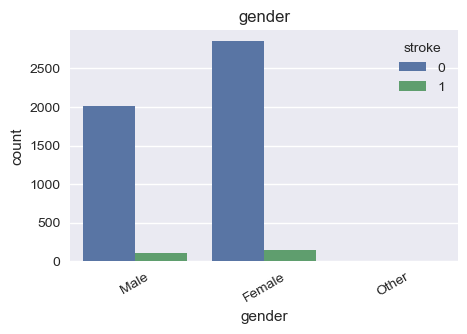

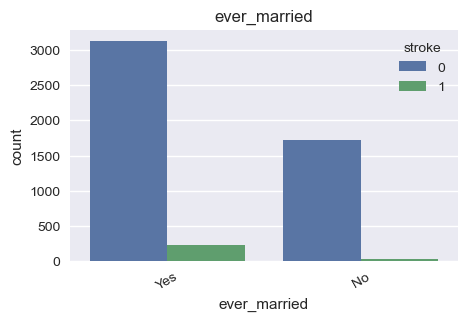

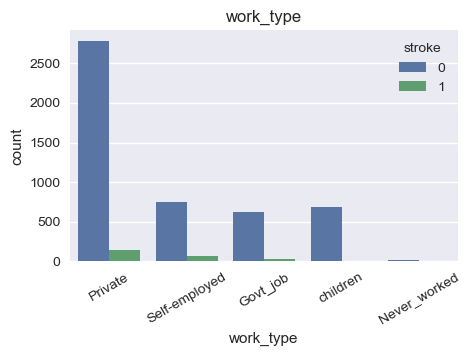

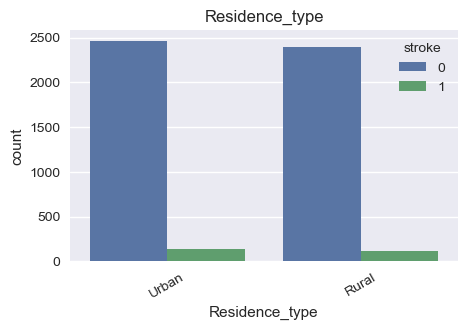

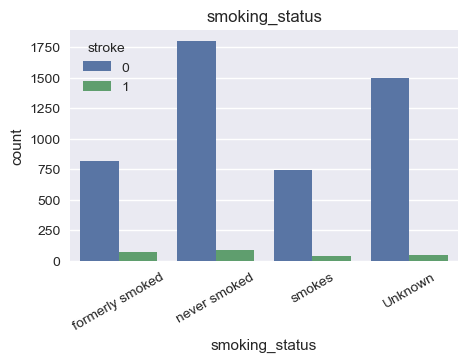

In [14]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, hue="stroke")
    plt.title(col)
    plt.xticks(rotation=30)
    plt.show()


질문:

“어떤 범주에서 stroke 비율이 상대적으로 높아 보이는지?”

기록 담당이 “EDA 인사이트 리스트” 만들어서 적게 해줘:

예) “고혈압=1 그룹에서 stroke 비율이 더 높음”,
“흡연 상태 unknown 비중이 커서 처리 전략 필요” 등.

In [15]:
# 사용하지 않을 컬럼 드롭
df_proc = df.copy()

# id는 식별자니까 제거
df_proc = df_proc.drop(columns=["id"])


In [16]:
# 결측치 처리
# 수치형
for col in ["bmi"]:
    median = df_proc[col].median()
    df_proc[col] = df_proc[col].fillna(median)

# 범주형
for col in cat_cols:
    df_proc[col] = df_proc[col].fillna("Unknown")


In [17]:
# 인코딩 & 스케일링 설계
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_proc.drop(columns=["stroke"])
y = df_proc["stroke"]

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## 오늘 EDA & 전처리 요약

- 데이터 개요 / 컬럼 구성
- 결측치 특성 및 처리 전략
- stroke 클래스 불균형 정도
- 수치형/범주형 주요 인사이트
- 최종 전처리 전략
    - id 드롭
    - 결측치: bmi → 중앙값 대체, 범주형 → "Unknown"
    - 수치형 스케일링, 범주형 원-핫 인코딩
    - train/test 분할 (stratify)


In [27]:
# bmi 컬럼 결측치 수와 비율 확인
n_missing = df['bmi'].isna().sum()                    # 결측치 개수
ratio_missing = (n_missing / len(df)) * 100           # 결측치 비율(%)

print("bmi 컬럼 결측치 수 :", n_missing)
print(f"bmi 컬럼 결측치 비율 : {ratio_missing:.2f}%")


bmi 컬럼 결측치 수 : 201
bmi 컬럼 결측치 비율 : 3.93%


In [30]:
# smoking_status 컬럼에서 'unknown' 값의 개수와 비율 확인
count_unknown = (df['smoking_status'] == 'Unknown').sum()        # 개수
ratio_unknown = (count_unknown / len(df)) * 100                  # 비율(%)

print("smoking_status 'unknown' 개수 :", count_unknown)
print(f"smoking_status 'unknown' 비율 : {ratio_unknown:.2f}%")


smoking_status 'unknown' 개수 : 1544
smoking_status 'unknown' 비율 : 30.22%


In [31]:
# smoking_status별 age의 평균, 중앙값 비교
df.groupby('smoking_status')['age'].agg(['mean', 'median', 'count']).round(2)


,mean,median,count
smoking_status,,,
Unknown,30.23,23.0,1544
formerly smoked,54.93,57.0,885
never smoked,46.74,47.0,1892
smokes,47.10,47.0,789


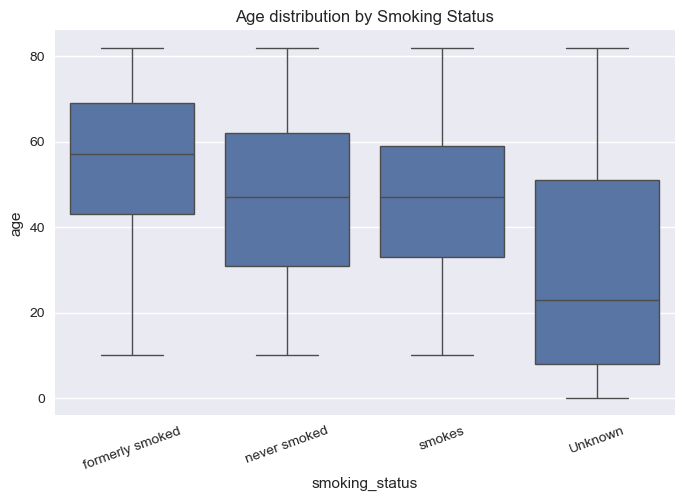

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='smoking_status', y='age')
plt.title("Age distribution by Smoking Status")
plt.xticks(rotation=20)
plt.show()


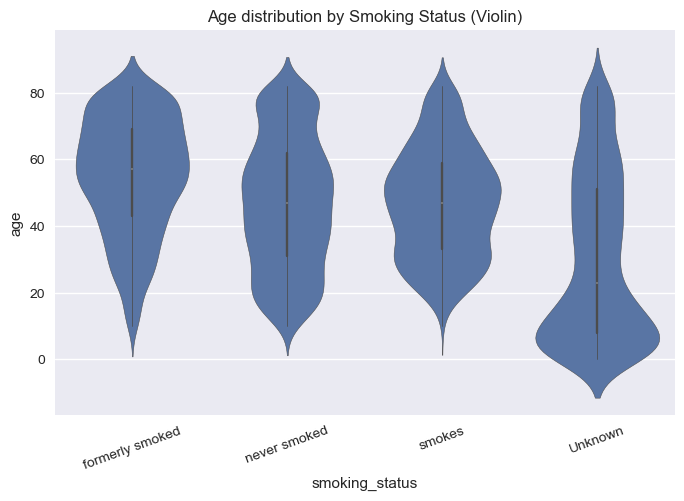

In [33]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='smoking_status', y='age')
plt.title("Age distribution by Smoking Status (Violin)")
plt.xticks(rotation=20)
plt.show()


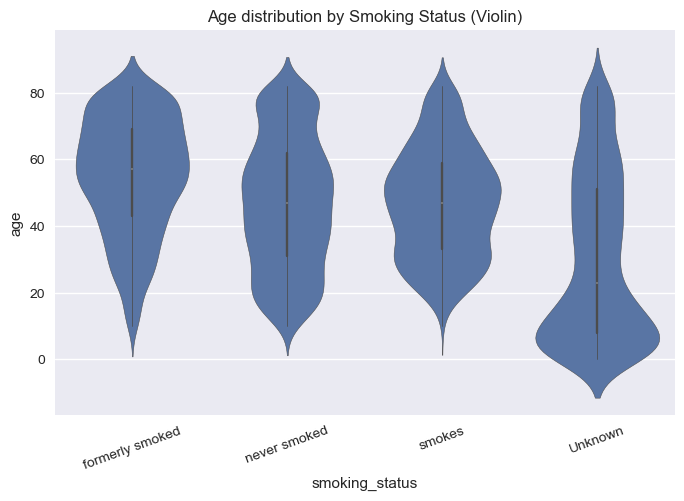

In [34]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='smoking_status', y='age')
plt.title("Age distribution by Smoking Status (Violin)")
plt.xticks(rotation=20)
plt.show()


In [35]:
# smoking_status별 stroke 발생 비율
ct = pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100
ct = ct.round(2)
ct


stroke,0,1
smoking_status,,
Unknown,96.96,3.04
formerly smoked,92.09,7.91
never smoked,95.24,4.76
smokes,94.68,5.32


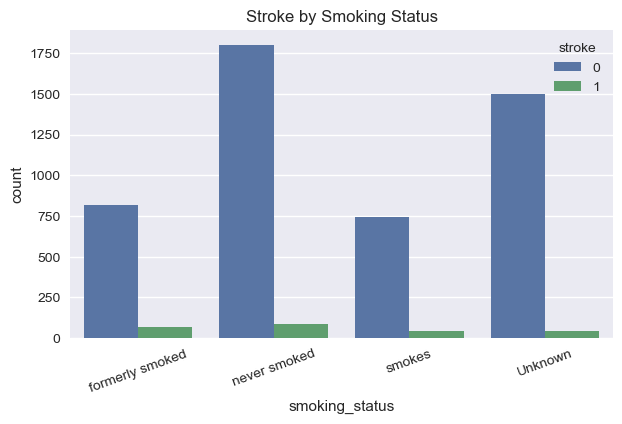

In [36]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title("Stroke by Smoking Status")
plt.xticks(rotation=20)
plt.show()


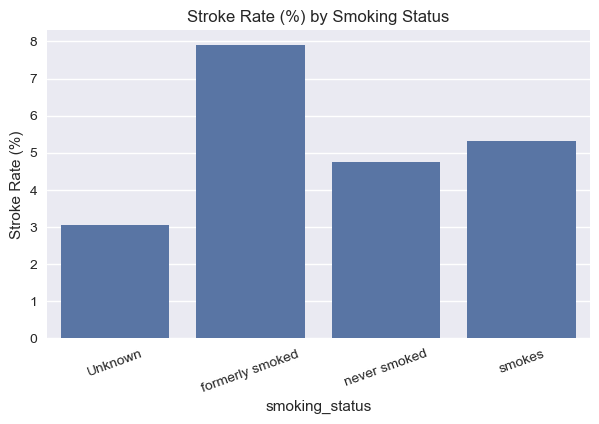

In [37]:
stroke_rate = (
    df.groupby('smoking_status')['stroke']
      .mean() * 100
).round(2)

plt.figure(figsize=(7,4))
sns.barplot(x=stroke_rate.index, y=stroke_rate.values)
plt.title("Stroke Rate (%) by Smoking Status")
plt.ylabel("Stroke Rate (%)")
plt.xticks(rotation=20)
plt.show()


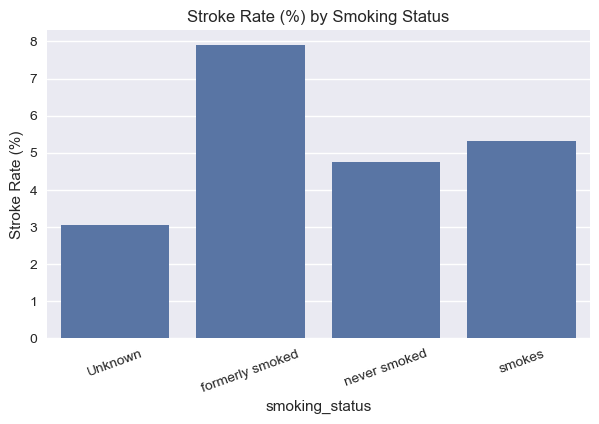

In [38]:
stroke_rate = (
    df.groupby('smoking_status')['stroke']
      .mean() * 100
).round(2)

plt.figure(figsize=(7,4))
sns.barplot(x=stroke_rate.index, y=stroke_rate.values)
plt.title("Stroke Rate (%) by Smoking Status")
plt.ylabel("Stroke Rate (%)")
plt.xticks(rotation=20)
plt.show()


In [39]:
df_under18 = df[df['age'] < 18]
df_under18.shape


(856, 12)

In [40]:
# age < 18 그룹의 smoking_status 빈도
df_under18['smoking_status'].value_counts()


smoking_status
Unknown            682
never smoked       140
formerly smoked     25
smokes               9
Name: count, dtype: int64

In [41]:
ct = pd.crosstab(df_under18['smoking_status'], 
                 df_under18['stroke'], 
                 normalize='index') * 100

ct.round(2)


stroke,0,1
smoking_status,,
Unknown,99.71,0.29
formerly smoked,100.00,0.00
never smoked,100.00,0.00
smokes,100.00,0.00


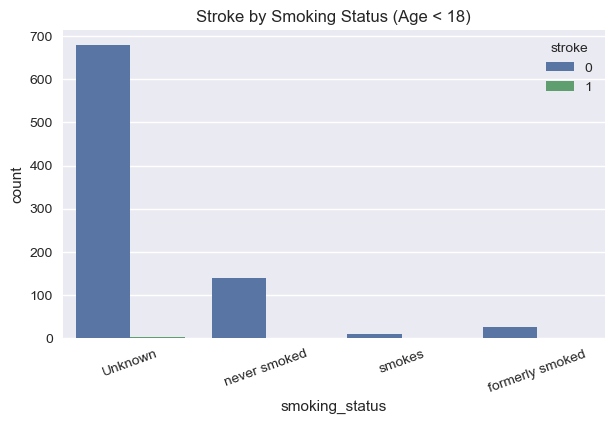

In [42]:
plt.figure(figsize=(7,4))
sns.countplot(data=df_under18, x='smoking_status', hue='stroke')
plt.title("Stroke by Smoking Status (Age < 18)")
plt.xticks(rotation=20)
plt.show()
